In [1]:
#Setting the working directory
import os
os.chdir('C:/Users/aksha/Desktop/Machine learning/HR_analytics')

In [2]:
import pandas as pd
import numpy as np

#Importing the dataset
dataset = pd.read_csv('Data_visualization_hr.csv')

In [3]:
#Preview of the data
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 21 columns):
Employee Name          301 non-null object
Employee Number        301 non-null int64
State                  301 non-null object
Zip                    301 non-null int64
DOB                    301 non-null object
Age                    301 non-null int64
Sex                    301 non-null object
MaritalDesc            301 non-null object
CitizenDesc            301 non-null object
Hispanic/Latino        301 non-null object
RaceDesc               301 non-null object
Date of Hire           301 non-null object
Date of Termination    103 non-null object
Reason For Term        301 non-null object
Employment Status      301 non-null object
Department             301 non-null object
Position               301 non-null object
Pay Rate               301 non-null float64
Manager Name           301 non-null object
Employee Source        301 non-null object
Performance Score      301 non-null o

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1103024456,MA,1450,11/24/1985,32,Female,Married,US Citizen,No,...,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1106026572,MA,1460,4/26/1984,33,Male,Divorced,US Citizen,No,...,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1302053333,MA,2703,9/1/1986,31,Male,Single,US Citizen,No,...,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1211050782,MA,2170,9/16/1985,32,Female,Married,US Citizen,No,...,2/16/2015,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1307059817,MA,2330,5/19/1988,29,Female,Single,US Citizen,No,...,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


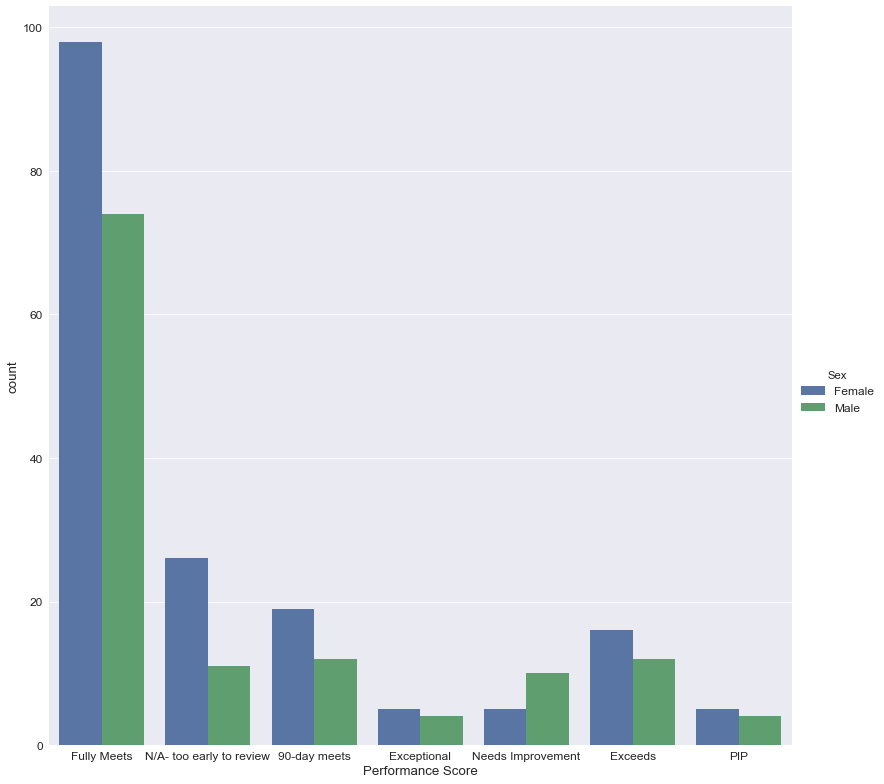

In [4]:
import seaborn as sns
sns.set_context('paper',font_scale=1.5)
%matplotlib inline
#Analysing sex vs performance
sns.factorplot('Performance Score',data=dataset,hue='Sex',kind="count",size=11)

It seems that female employees outperform male employees. I remember reading a Harvard Business Review article saying that women employees are found to be better managers than their male counterparts for different reasons. The graph above shows similar trend.

Age is another major factor that can influence the performance. Let's boxplot performance vs age.

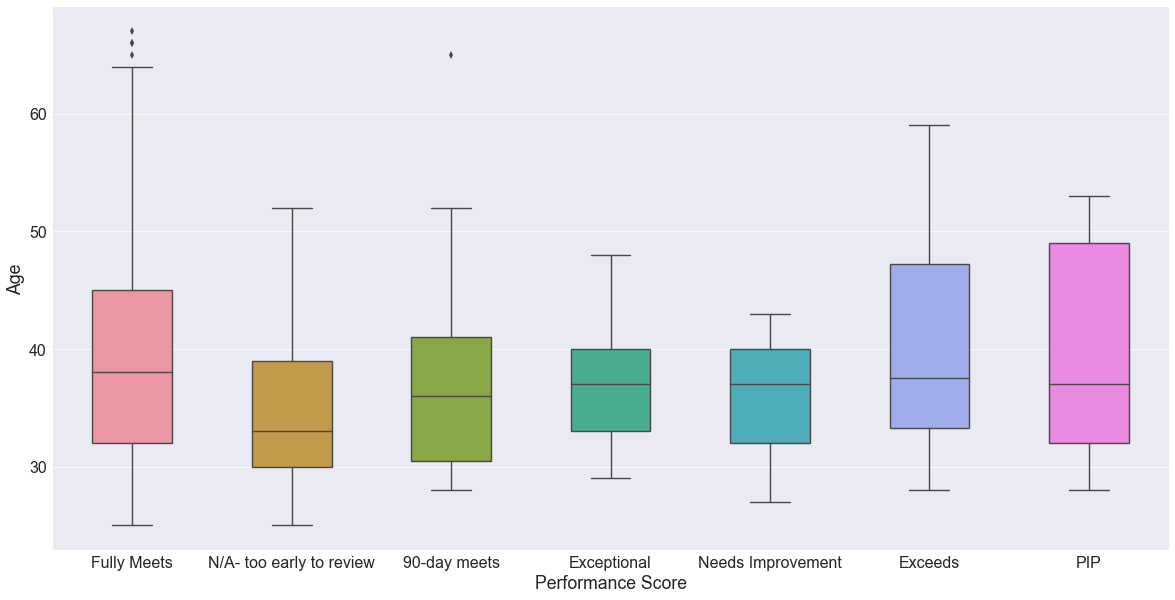

In [5]:
from matplotlib import pyplot
sns.set_context('paper',font_scale=2)
fig, axe = pyplot.subplots(figsize=(20,10))
sns.boxplot(x="Performance Score", y="Age", data=dataset,width=0.5,ax=axe)

The median for all Performance indexes is almost the same (except for people who are newly joined). Comparison "Needs improvement" and "Exceeds" categories shows that there are more people above 38 who need improvement (because the spread of the data is less in "Need improvement" category for age > 38 i.e. data is cramped up in that interval) and more people below 38 who exceed the set performance standards.  
This indicates that younger people are more perfromance oriented may be because they have enthusiasm to learn and climb up the ladder. 

Another way to look at the same data is through violin plot.

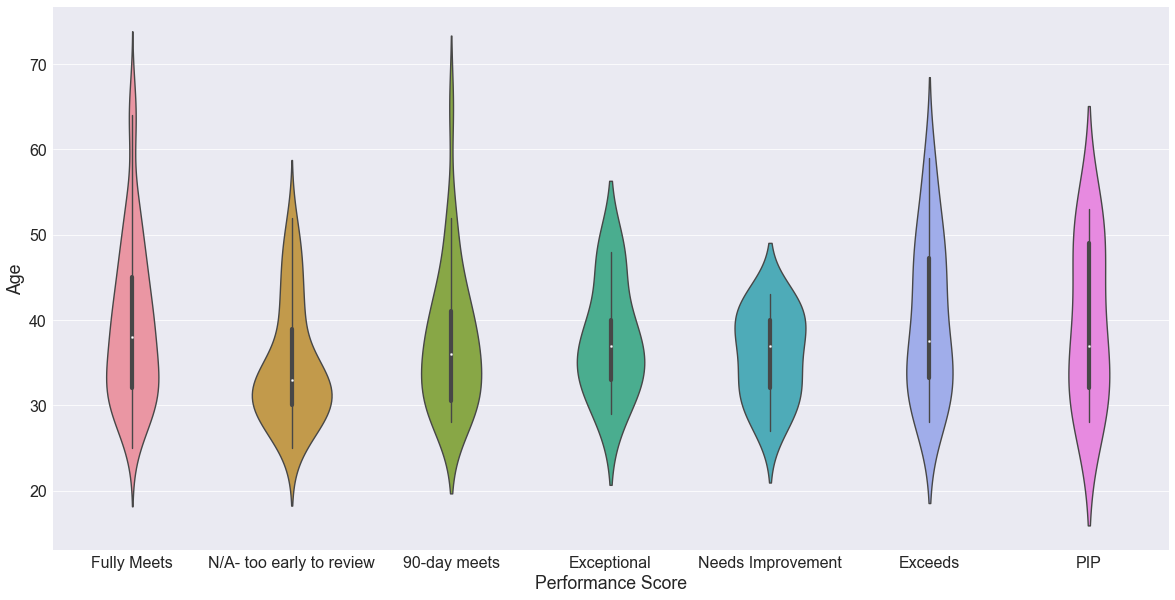

In [6]:
fig, axe = pyplot.subplots(figsize=(20,10))
sns.violinplot(x="Performance Score", y="Age", data=dataset,width=0.5,ax=axe)

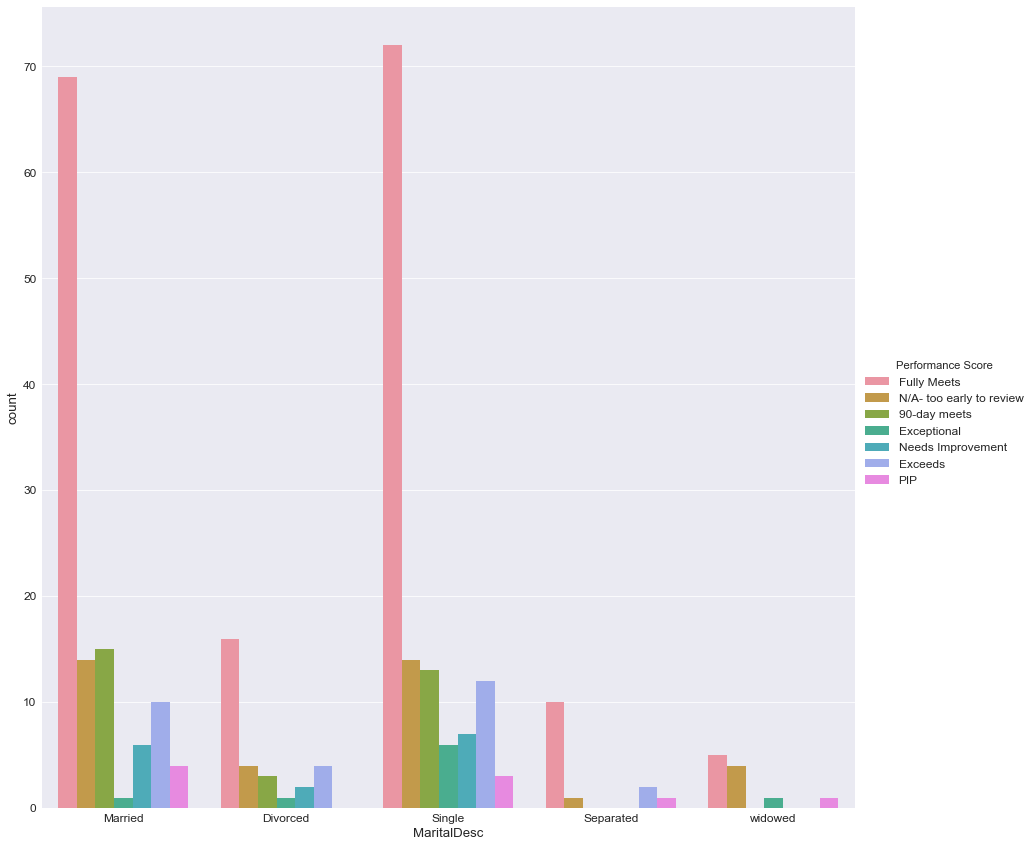

In [7]:
sns.set_context('paper',font_scale=1.5)
sns.factorplot('MaritalDesc',data=dataset,hue='Performance Score',kind="count",size=12)

Apparently single people show better performance standards as compared to other people. 

Now let's see if race has any effect on the performance

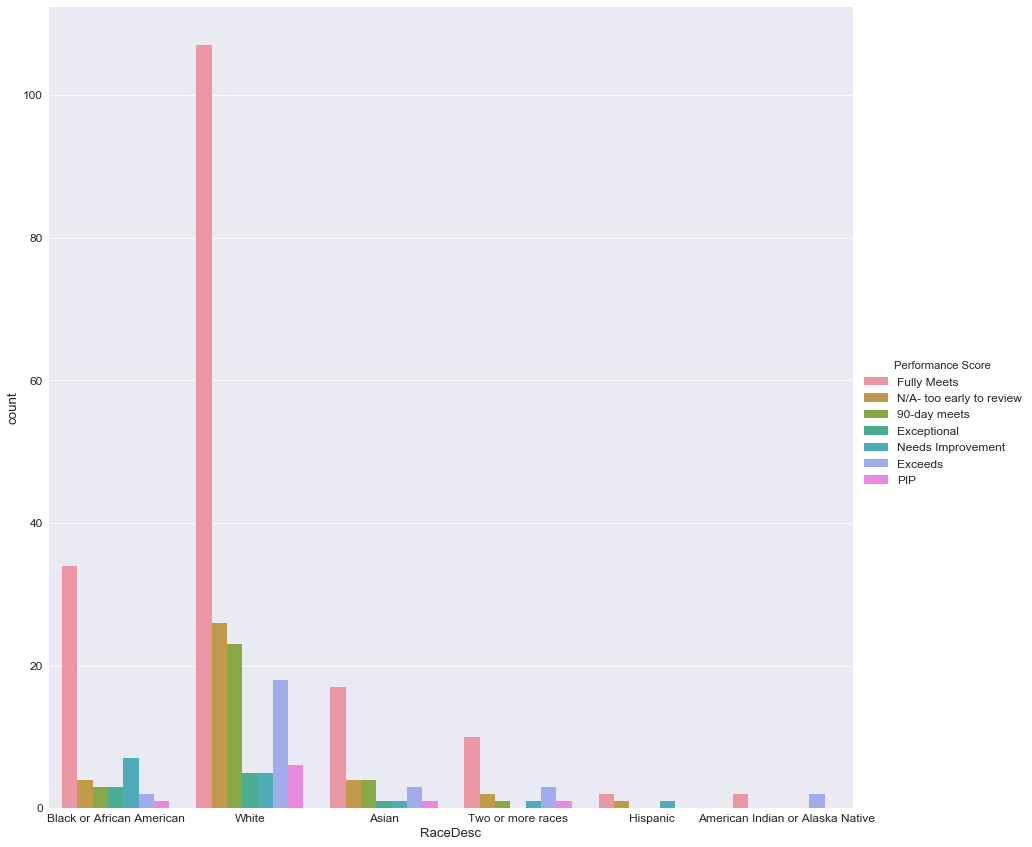

In [8]:
sns.factorplot('RaceDesc',data=dataset,hue='Performance Score',kind="count",size=12)

Majority of people of all races meet the performance standards. The fraction of people who need improvement is greater in the Black or African American category. It seems that the organisation has maximum of white population. The Alaska Native people although a very small fraction but all of them exceed the performance standards.

Now let's compare different departments on performance basis. 

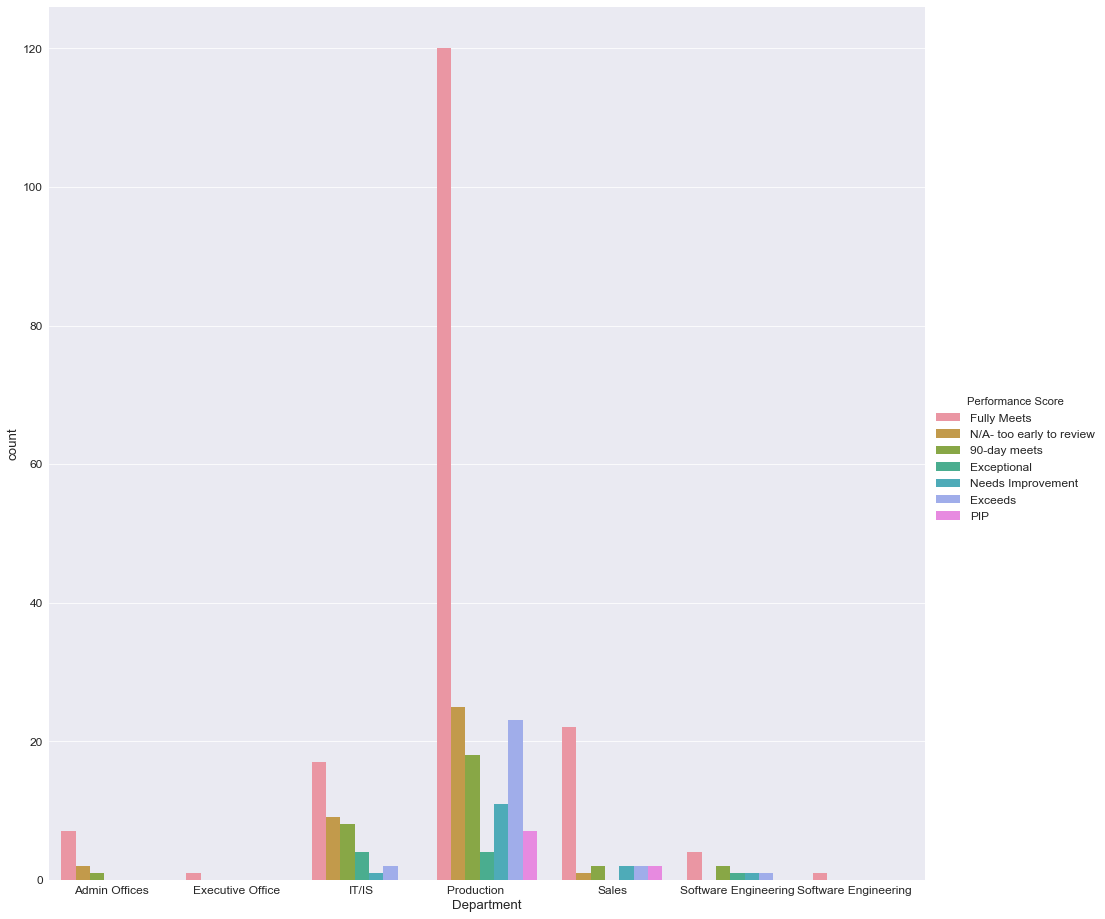

In [9]:
sns.factorplot('Department',data=dataset,hue='Performance Score',kind="count",size=13)

It seems production department has highest fraction of perfomant employees. The organsation may look for the reasons as why is Production deprtment employees are performing better and then apply those ways to other departments to boost their score.

Now lets take a look at how money influences the work performance.

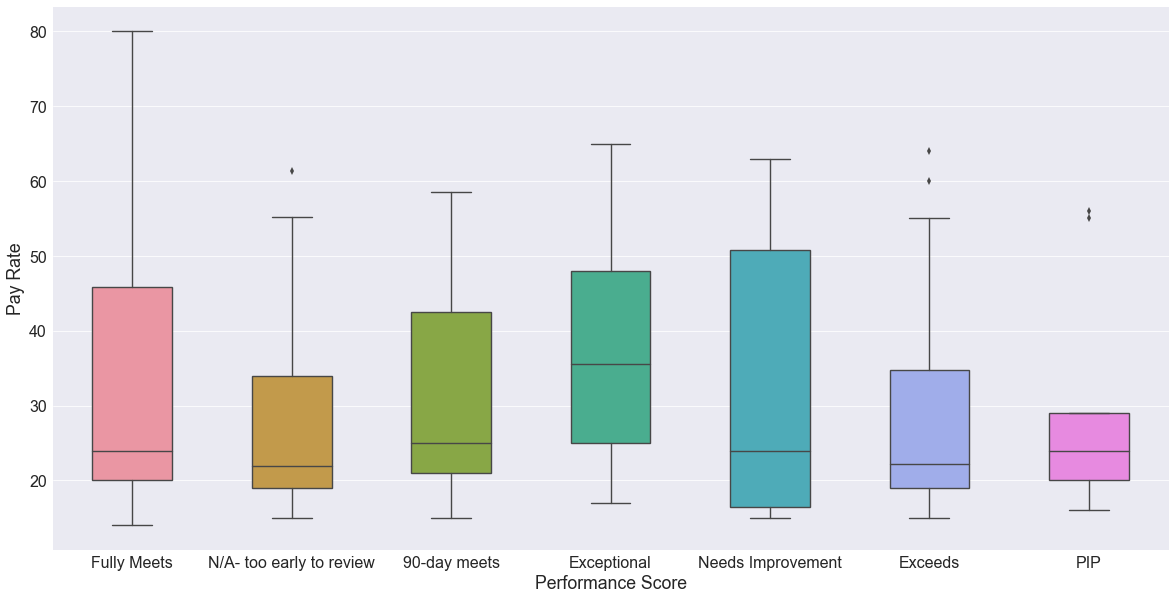

In [10]:
sns.set_context('paper',font_scale=2)
fig, axe = pyplot.subplots(figsize=(20,10))
sns.boxplot(x="Performance Score", y="Pay Rate", data=dataset,width=0.5,ax=axe)

Although all the categories of the perfomance score overlap each other but it seems that people with exceptional perfomance do have higher salary. Also people who need improvement seem to be crowded in the range of 15 to 25 approx. i.e. with lower salary. 
So money can be said to be a major factor influencing perfomance score.

Having good managers is an important factor that leads to better performance by the employees.

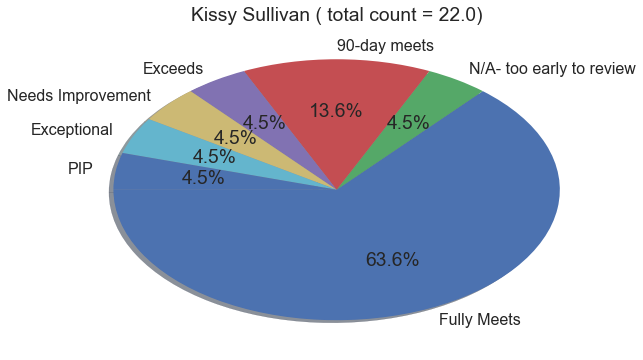

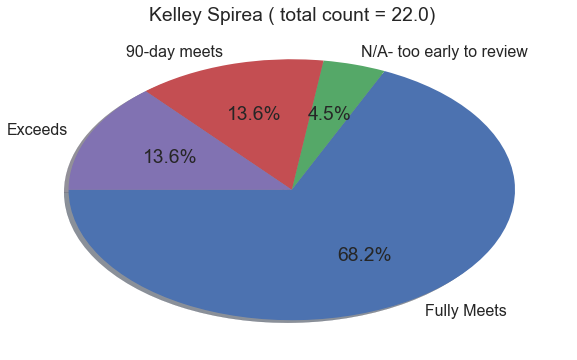

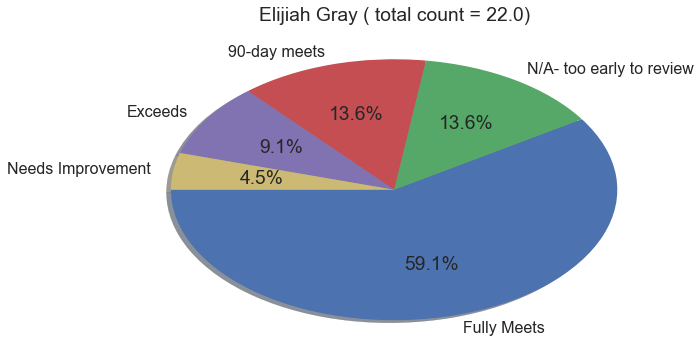

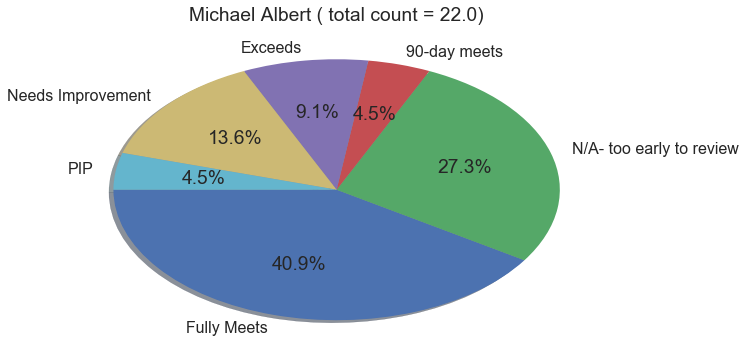

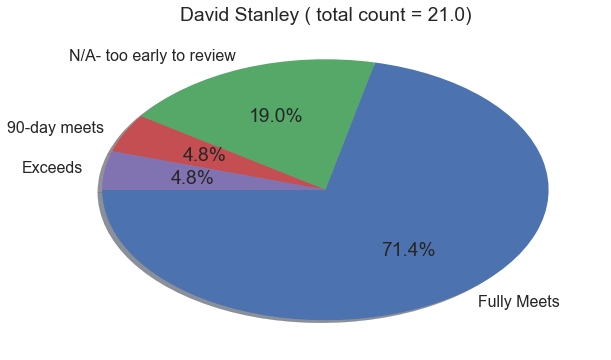

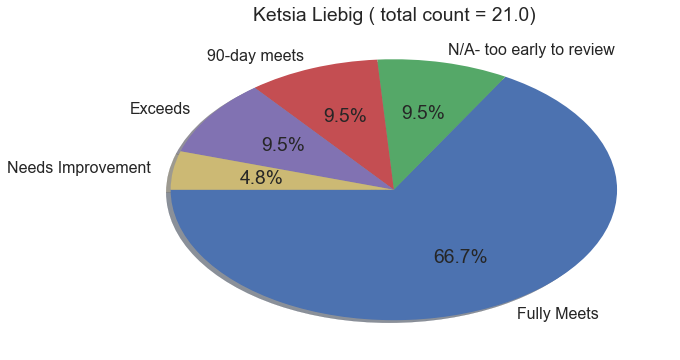

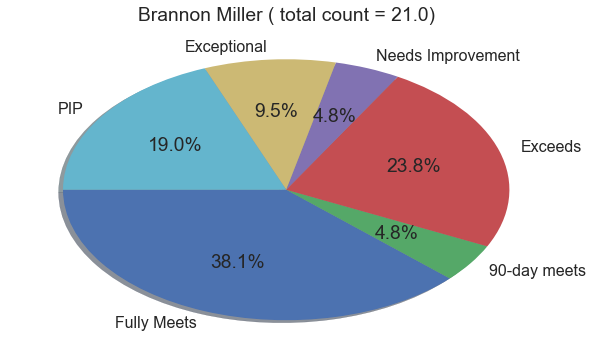

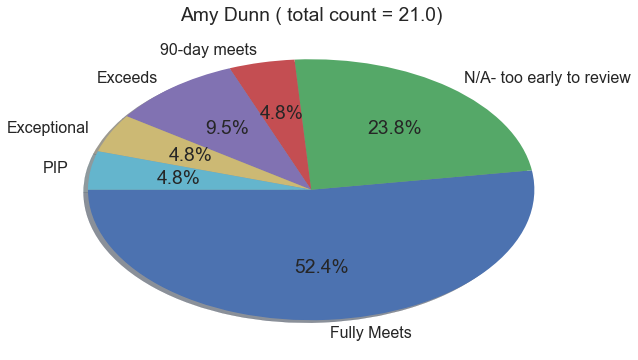

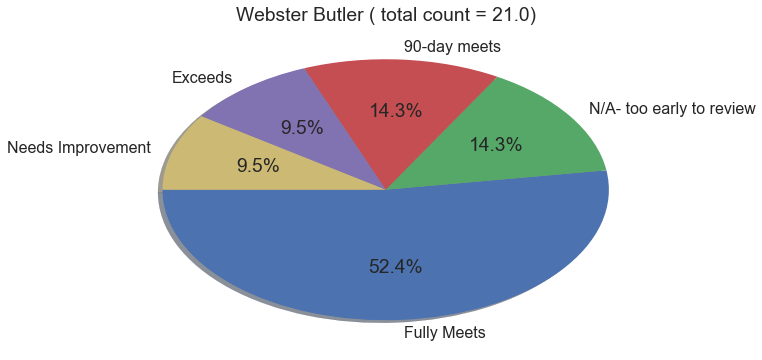

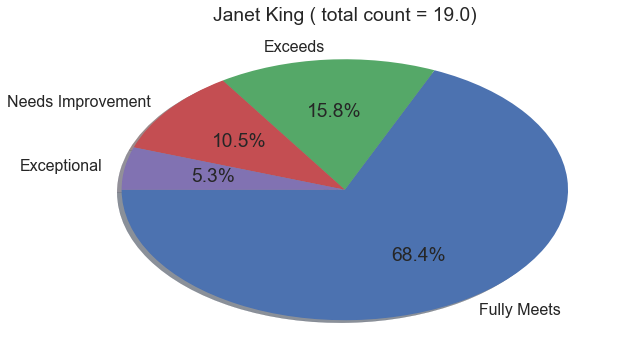

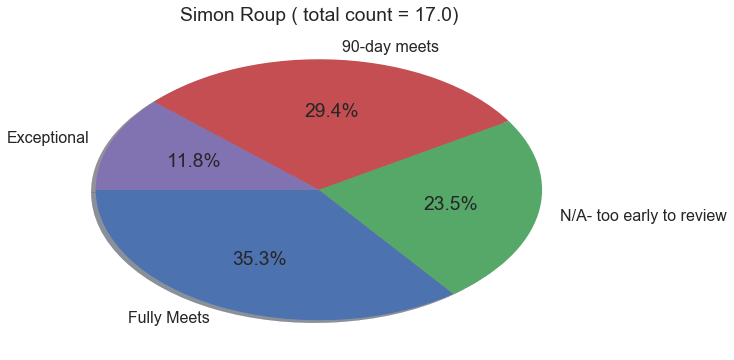

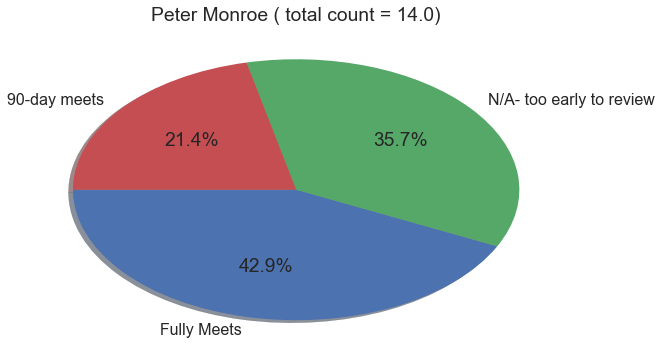

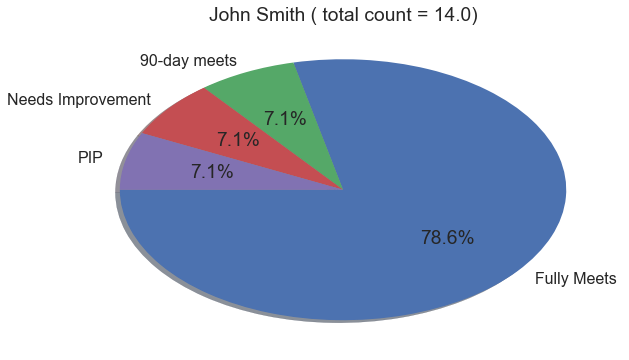

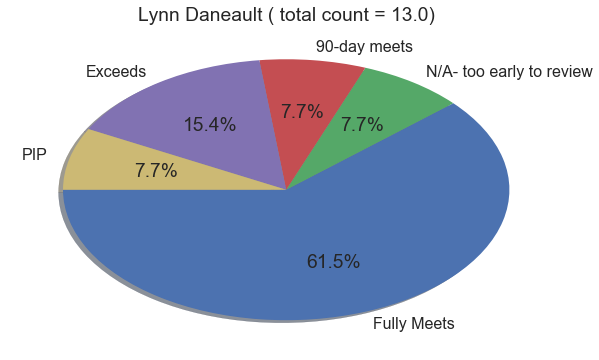

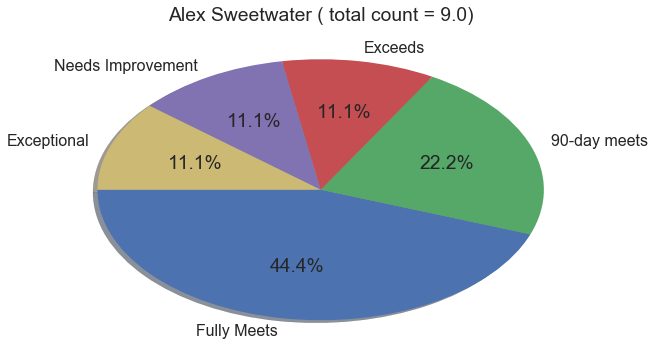

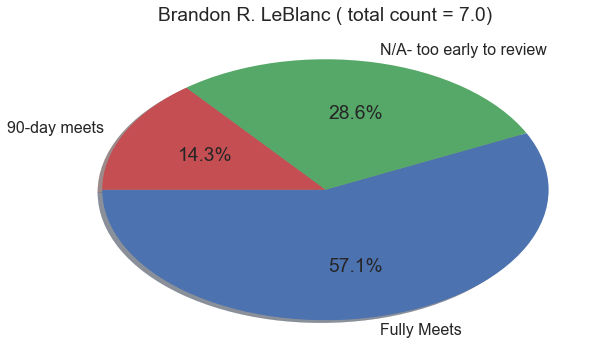

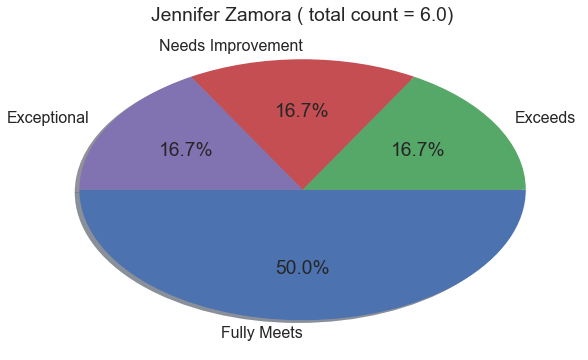

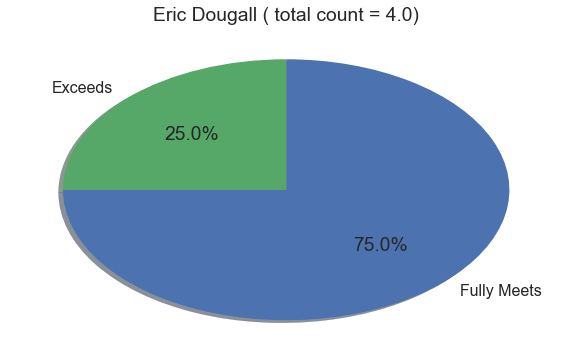

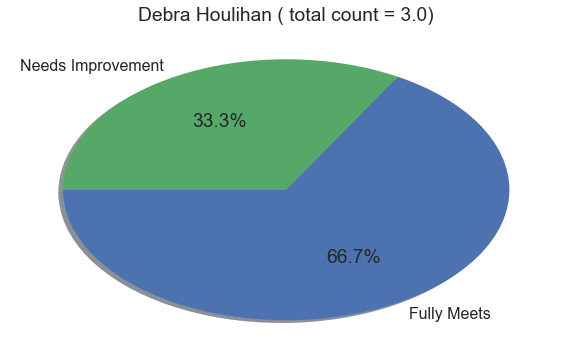

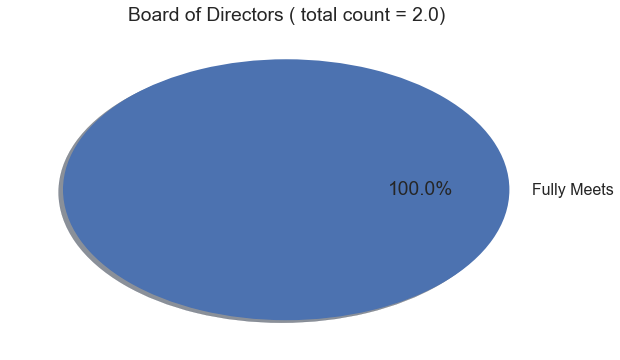

In [35]:
man_names = dataset['Manager Name'].value_counts()
perf_score = dataset['Performance Score'].value_counts()
for names in man_names.index:
    count = np.zeros(7)
    label = []
    size = []
    count[0] = len((np.where(np.logical_and(dataset['Manager Name']==names, dataset['Performance Score']==perf_score.index[0])))[0])
    count[1] = len((np.where(np.logical_and(dataset['Manager Name']==names, dataset['Performance Score']==perf_score.index[1])))[0])
    count[2] = len((np.where(np.logical_and(dataset['Manager Name']==names, dataset['Performance Score']==perf_score.index[2])))[0])
    count[3] = len((np.where(np.logical_and(dataset['Manager Name']==names, dataset['Performance Score']==perf_score.index[3])))[0])
    count[4] = len((np.where(np.logical_and(dataset['Manager Name']==names, dataset['Performance Score']==perf_score.index[4])))[0])
    count[5] = len((np.where(np.logical_and(dataset['Manager Name']==names, dataset['Performance Score']==perf_score.index[5])))[0])
    count[6] = len((np.where(np.logical_and(dataset['Manager Name']==names, dataset['Performance Score']==perf_score.index[6])))[0])
    total_count = str(sum(count))
    for i in range(0,len(count)):
        if count[i] != 0:
            label.append(perf_score.index[i])
            size.append(count[i])
    
    fig = pyplot.figure(figsize=(10,6))
    pyplot.pie(size, labels=label,
        autopct='%1.1f%%', shadow=True, startangle=180)
 
    #pyplot.axis('equal')
    pyplot.title(names + ' ' + '( total count = ' + total_count + ')')
    pyplot.show()

It seems Michael Albert manage higher number of people who need improvement but it can also be seen that he has higher number of new people too. So chances are that he may be a new manager and be in learning mode.
Kelley Spirea seems to be a good manager as she manages higher number of people fully meet the performance teria and exceed the performance teria. 

Now lets check how the source of employment affects the perfromance score 

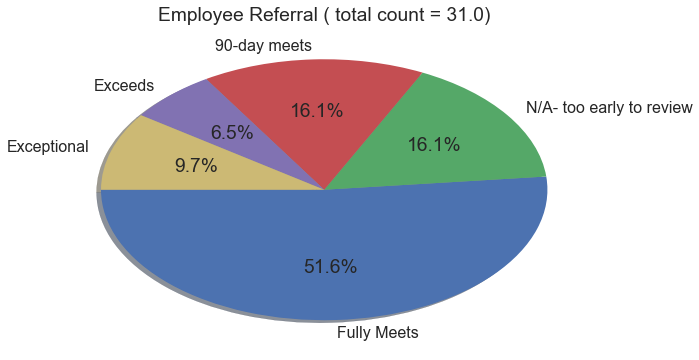

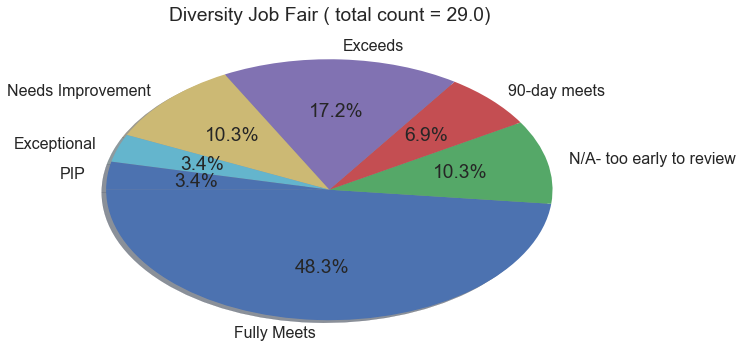

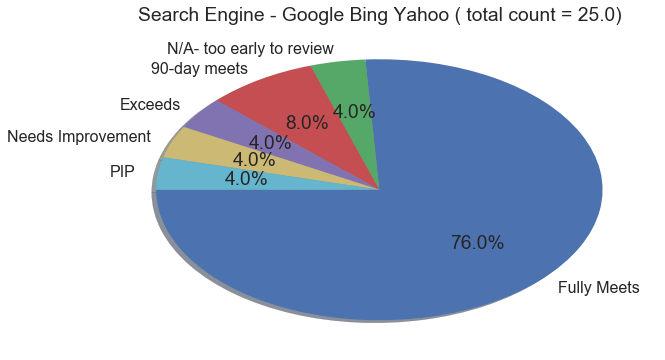

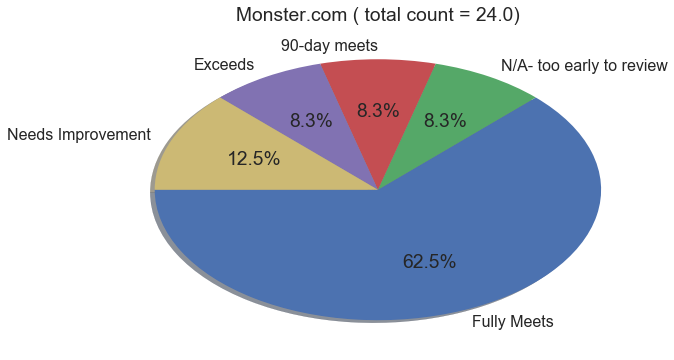

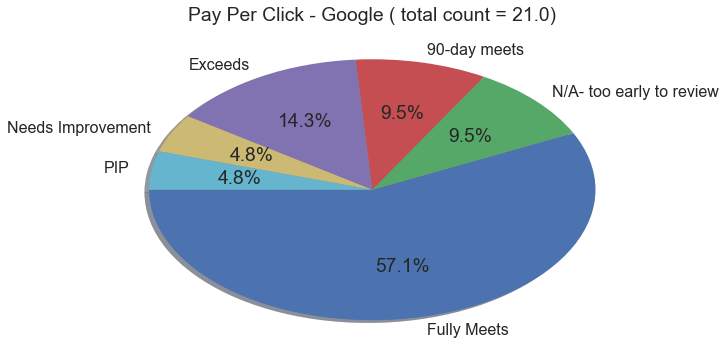

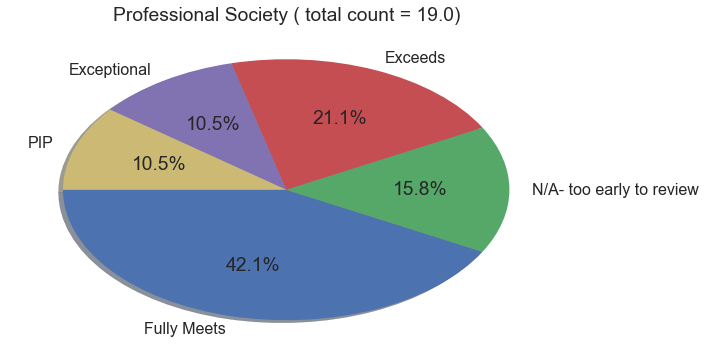

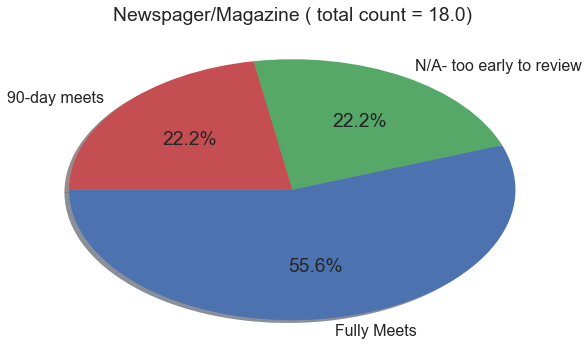

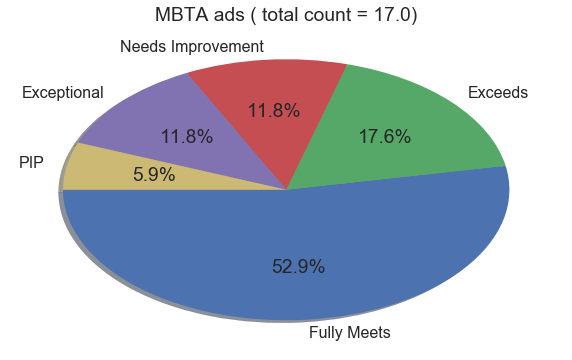

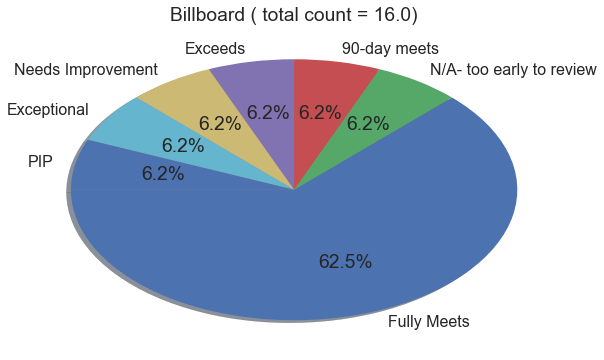

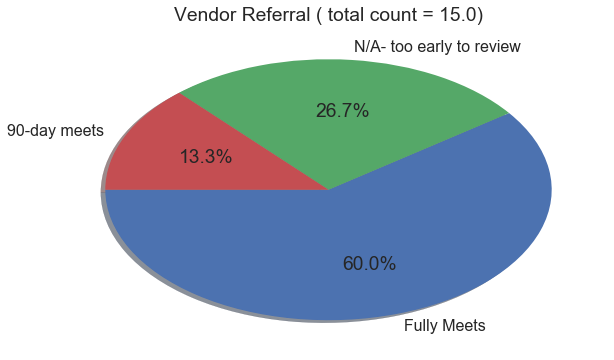

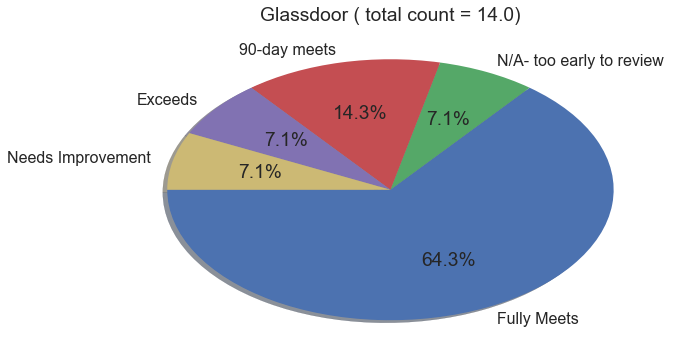

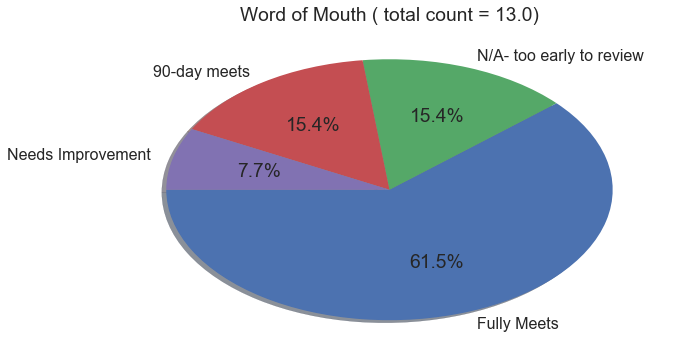

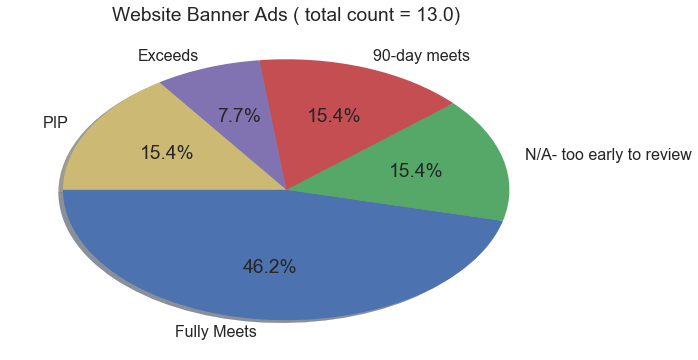

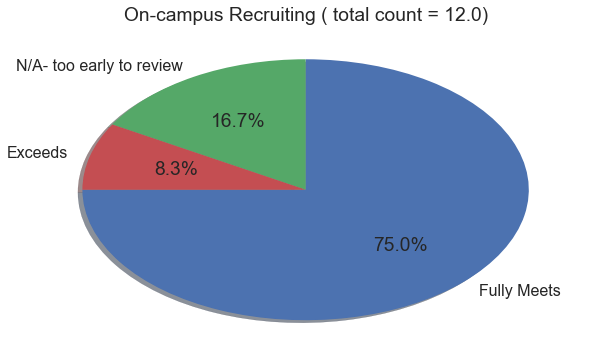

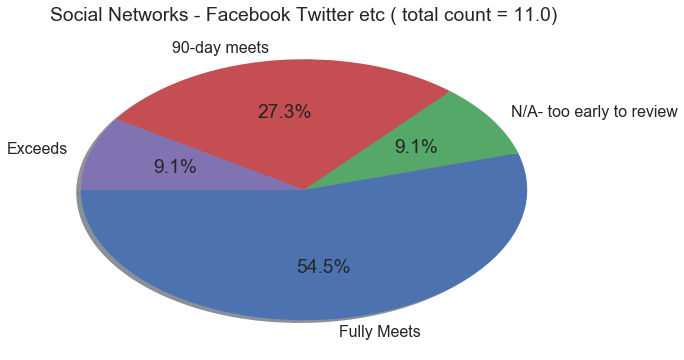

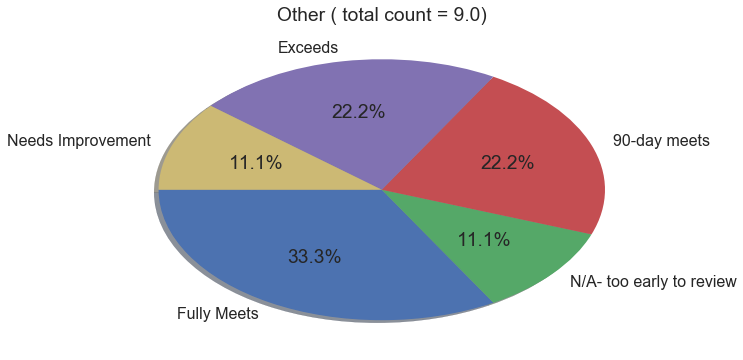

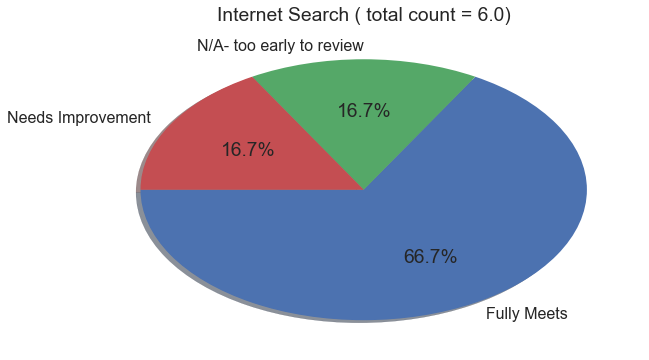

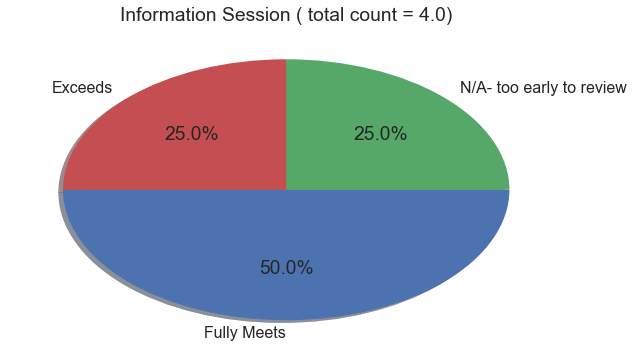

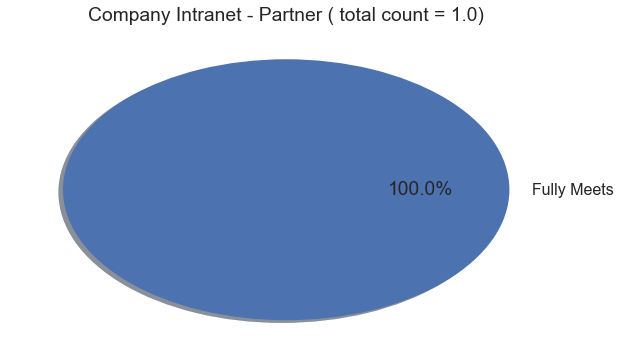

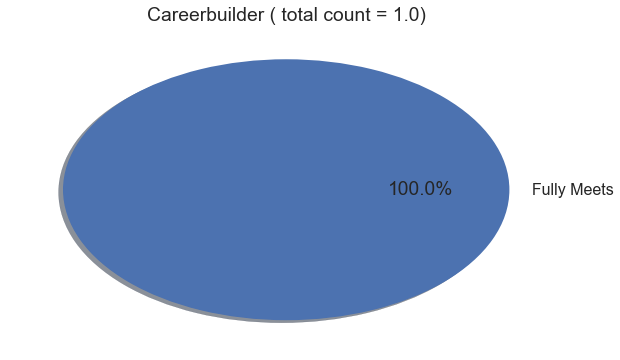

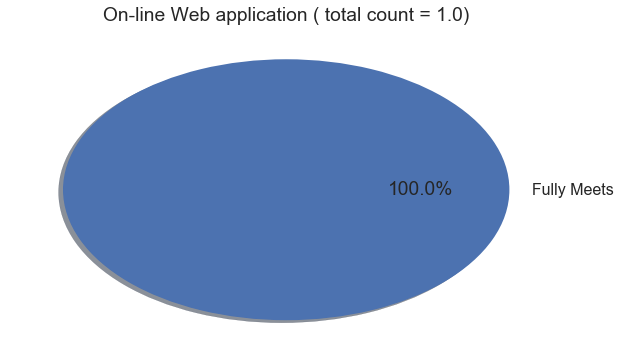

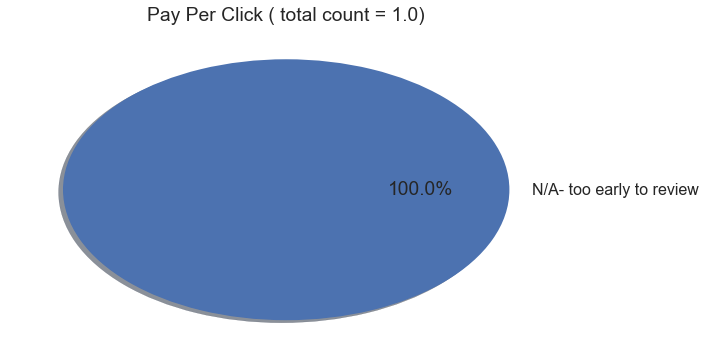

In [37]:
source_names = dataset['Employee Source'].value_counts()
perf_score = dataset['Performance Score'].value_counts()
for names in source_names.index:
    count = np.zeros(7)
    label = []
    size = []
    count[0] = len((np.where(np.logical_and(dataset['Employee Source']==names, dataset['Performance Score']==perf_score.index[0])))[0])
    count[1] = len((np.where(np.logical_and(dataset['Employee Source']==names, dataset['Performance Score']==perf_score.index[1])))[0])
    count[2] = len((np.where(np.logical_and(dataset['Employee Source']==names, dataset['Performance Score']==perf_score.index[2])))[0])
    count[3] = len((np.where(np.logical_and(dataset['Employee Source']==names, dataset['Performance Score']==perf_score.index[3])))[0])
    count[4] = len((np.where(np.logical_and(dataset['Employee Source']==names, dataset['Performance Score']==perf_score.index[4])))[0])
    count[5] = len((np.where(np.logical_and(dataset['Employee Source']==names, dataset['Performance Score']==perf_score.index[5])))[0])
    count[6] = len((np.where(np.logical_and(dataset['Employee Source']==names, dataset['Performance Score']==perf_score.index[6])))[0])
    total_count = str(sum(count))
    for i in range(0,len(count)):
        if count[i] != 0:
            label.append(perf_score.index[i])
            size.append(count[i])
    
    fig = pyplot.figure(figsize=(10,6))
    pyplot.pie(size, labels=label,
        autopct='%1.1f%%', shadow=True, startangle=180)
 
    #pyplot.axis('equal')
    pyplot.title(names + ' ' + '( total count = ' + total_count + ')')
    pyplot.show()

In the next section we check if sex affects the performance of different positions i.e. whether a specfic role is better played by either male or women employee


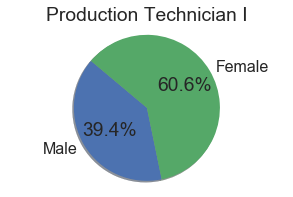

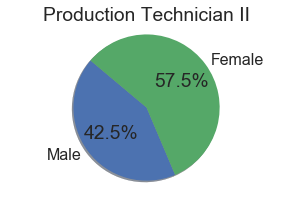

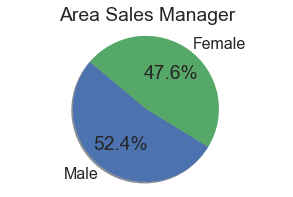

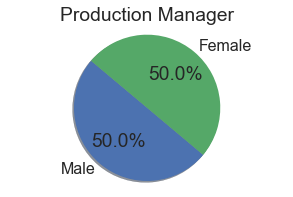

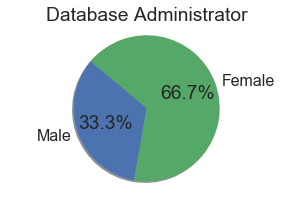

In [40]:
positions = dataset['Position'].value_counts()
major_pos = positions[0:5]
perf_cri = [perf_score.index[0],perf_score.index[3],perf_score.index[5]]
for pos in major_pos.index:
    fem_indx = (np.where(np.logical_and(dataset['Position']==pos, dataset['Sex']=='Female')))[0]
    male_indx = (np.where(np.logical_and(dataset['Position']==pos, dataset['Sex']=='Male')))[0]
    count_fem = 0
    count_male = 0
    for indx in fem_indx:
        if dataset['Performance Score'][indx] in perf_cri:
            count_fem = count_fem + 1
    for indx in male_indx:
        if dataset['Performance Score'][indx] in perf_cri:
            count_male = count_male + 1
    label = ['Male','Female']
    size = [count_male,count_fem]
    fig = pyplot.figure(figsize=(5,3))
    pyplot.pie(size,labels=label,autopct='%1.1f%%', shadow=True, startangle=140)
    pyplot.title(pos)
    pyplot.axis('equal')
    pyplot.show()

The pie charts show fraction of male and female employees that are good performers for a particular position. It seems like female employees are better in most of the departments (except area sales manager). 
for example, for production technician 1 position, out of the total good performers, 60.6% were female and remaining male.

Now lets check if both the sexes get similar salary for the same position

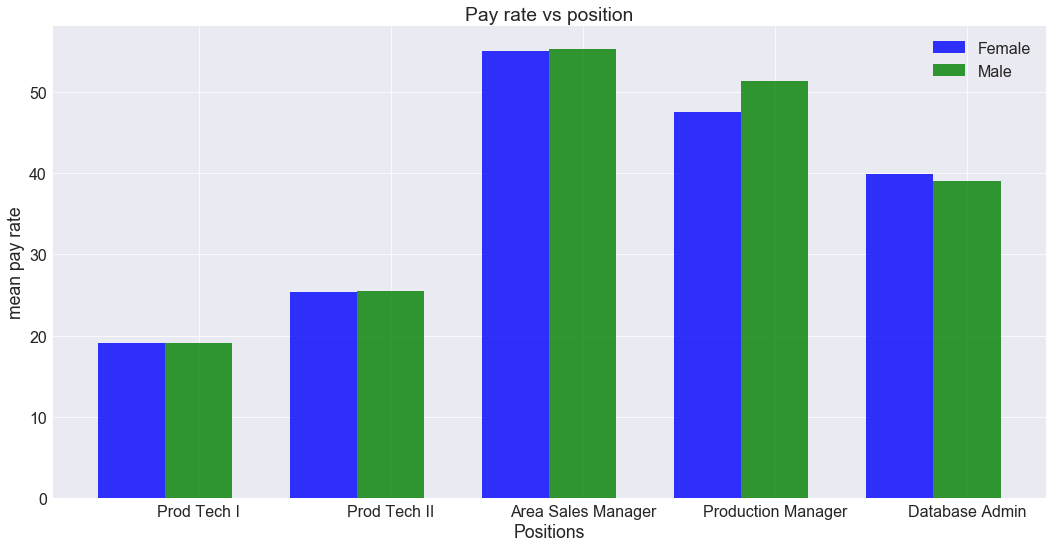

In [46]:
positions = dataset['Position'].value_counts()
major_pos = positions[0:5]
perf_cri = [perf_score.index[0],perf_score.index[3],perf_score.index[5]]
mean_fem = []
mean_male = []
for pos in major_pos.index:
    fem_indx = (np.where(np.logical_and(dataset['Position']==pos, dataset['Sex']=='Female')))[0]
    male_indx = (np.where(np.logical_and(dataset['Position']==pos, dataset['Sex']=='Male')))[0]
    mean_fem.append(dataset['Pay Rate'][fem_indx].mean())
    mean_male.append(dataset['Pay Rate'][male_indx].mean())
    
n_groups = 5
# create plot
fig = pyplot.figure(figsize=(15,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = pyplot.bar(index, mean_fem, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Female')
 
rects2 = pyplot.bar(index + bar_width, mean_male, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Male')
 
pyplot.xlabel('Positions')
pyplot.ylabel('mean pay rate')
pyplot.title('Pay rate vs position')
pyplot.xticks(index + bar_width, ('Prod Tech I', 'Prod Tech II', 'Area Sales Manager', 'Production Manager', 'Database Admin'))
pyplot.legend()
pyplot.tight_layout()
pyplot.show()

It seems that the organisation does not differentiate between sexes when it comes to salary.